# EDA com pandas e seaborn

Já vimos algumas das etapas da EDA – principalmente análise numérica, com algumas plotagens. 

Há muitos outros gráficos que não abordamos anteriormente: boxplots, gráficos de violino, correlogramas, gráficos de valores ausentes e muito mais. Vejamos a criação de alguns desses plots.

Carregar e transformar dados.

https://github.com/PacktPublishing/Practical-Data-Science-with-Python/tree/main/5-Chapter-5/data

In [ ]:
import pandas as pd

In [ ]:
#df = pd.read_csv('data/itunes_data.csv')

link = 'https://raw.githubusercontent.com/PacktPublishing/Practical-Data-Science-with-Python/main/5-Chapter-5/data/itunes_data.csv'
df = pd.read_csv(link)


In [ ]:
df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock,For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,Rock,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,Rock,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,Rock,For Those About To Rock We Salute You,AC/DC
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,Rock,For Those About To Rock We Salute You,AC/DC


In [ ]:
df['Minutes'] = df['Milliseconds'] / (1000 * 60)
df['MB'] = df['Bytes'] / 1000000
df.drop(['Milliseconds', 'Bytes'], axis=1, inplace=True)

In [ ]:
df.head()

,Track,Composer,UnitPrice,Genre,Album,Artist,Minutes,MB
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,5.728650,11.170334
1,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.427700,6.713451
2,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.898767,7.636561
3,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.513900,6.852860
4,Snowballed,"Angus Young, Malcolm Young, Brian Johnson",0.99,Rock,For Those About To Rock We Salute You,AC/DC,3.385033,6.599424


## Boxplots 

Primeiro, vamos dar uma olhada no boxplot clássico. 

Isso foi inventado em 1970 pelo lendário estatístico e matemático John Tukey. 

O boxplot nos ajuda a ver rapidamente algumas informações sobre a distribuição de um conjunto de dados e nos permite comparar subconjuntos de dados facilmente.

In [ ]:
import matplotlib.pyplot as plt

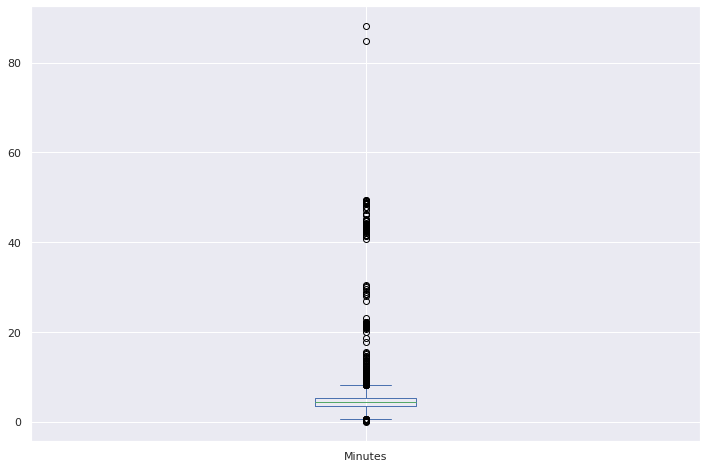

In [ ]:
df['Minutes'].plot.box(figsize=(12,8))

In [ ]:
df['Minutes'].describe()

count    3503.000000
mean        6.559987
std         8.916757
min         0.017850
25%         3.454683
50%         4.260567
75%         5.360750
max        88.115883
Name: Minutes, dtype: float64

Um boxplot tem alguns componentes. Primeiro, a linha horizontal no centro da caixa é a mediana, também conhecida como 50º percentil ou 2º quartil (Q2). 

Este é o ponto de dados intermediário em nossa série de dados quando ordenados do menor para o maior. 



A parte inferior e superior da caixa são o primeiro e o terceiro quartis (Q1 e Q3).

Esses quartis são formados quando dividimos um conjunto de dados em quatro partes iguais por valores ascendentes ou descendentes. Portanto, 25% dos dados estão no primeiro trimestre ou abaixo e 25% acima do terceiro trimestre. 

Você também pode pensar em Q1 como o ponto de dados intermediário entre o mínimo e a mediana. 



Os "bigodes" da caixa são os limites atípicos (outliers). 

Normalmente, eles são calculados com: 
* Q1 - 1,5 * IQR e 
* Q3 + 1,5 * IQR, 

onde IQR é Q3 - Q1 (o intervalo interquartil). Os pontos plotados fora dos bigodes são os outliers de acordo com o método IQR.

No caso deste conjunto de dados, podemos ver que os 50% do meio dos dados são compactados em um pequeno intervalo em torno da duração da música de 5 minutos. 

No entanto, também vemos muitos outliers, especialmente no lado alto. 

Na verdade, essa é uma das desvantagens de um boxplot clássico – geralmente não funciona bem com conjuntos de dados maiores e pode mostrar muitos valores discrepantes. 
* Ele foi projetado em uma época em que os conjuntos de dados eram pequenos e até explorados por meio de gráficos desenhados à mão. 
* Agora, nossos conjuntos de dados são tão grandes que alguns desses métodos mais antigos não funcionam bem com eles, e novos métodos foram projetados.

## Boxenplots

O gráfico letter-value. 
* Isso foi inventado por volta de 2011 por um trio de estatísticos, incluindo o famoso Hadley Wickham. 
* Wickham é bem conhecido em ciência de dados devido ao seu extenso trabalho em R e estatística - ele é autor e mantém várias bibliotecas de ciência de dados proeminentes em R e tem vários livros publicados sobre ciência de dados com R. 
* Wickham ajudou a criar o gráfico letter-value para melhorar as deficiências do boxplot. 

Em vez de mostrar quaisquer valores atípicos fora do IQR, um método (de quatro métodos possíveis) para plotar valores atípicos com um gráfico letter-value resulta em cinco a oito valores atípicos nos extremos superior e inferior. 

O gráfico letter-value também mostra melhor a distribuição agrupando os dados em mais quantis. 
* Dê uma olhada na diferença entre o boxplot e o gráfico de valor de letra (que atende pelo nome "boxenplot" em seaborn):

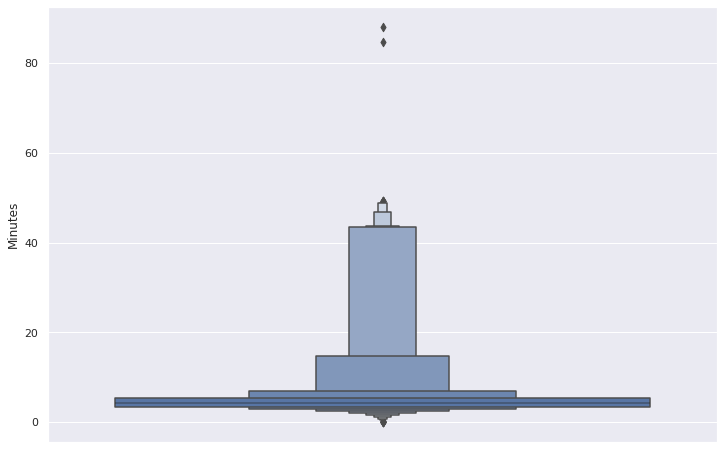

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.boxenplot(y=df['Minutes']);

O gráfico letter-value melhora o boxplot adicionando mais quantis. 

* A mediana ainda é mostrada como uma linha horizontal dentro da caixa central e maior. 
* Esta caixa do meio, que se estende acima e abaixo da mediana, contém metade dos dados. 




Cada conjunto de caixas além da caixa maior contém uma quantidade cada vez menor que é cortada pela metade repetidamente: 
* o próximo conjunto de caixas contém cerca de 25% dos dados, 
* as próximas duas caixas contêm cerca de 12,5% dos dados e assim por diante, 
* com cada conjunto de caixas contendo cerca de metade da porcentagem de dados do conjunto anterior de caixas. 



Também podemos ver que essas caixas têm tons mais claros e uma largura menor à medida que saem da mediana, 
* o que significa menos pontos em cada caixa. 

Por padrão, as caixas terminam quando temos aproximadamente cinco a oito pontos totais como valores discrepantes fora das caixas.

Esse valores discrepantes podem ser muito interessantes ou podem ser erros de cadastro.

Existem três outras maneiras de definir o algoritmo para o número de valores discrepantes com gráficos de valor de letra usando o argumento k_depth. A documentação da função mostra as opções aqui: 
https://seaborn.pydata.org/generated/seaborn.boxenplot.html


Podemos ver vários plots ao mesmo tempo

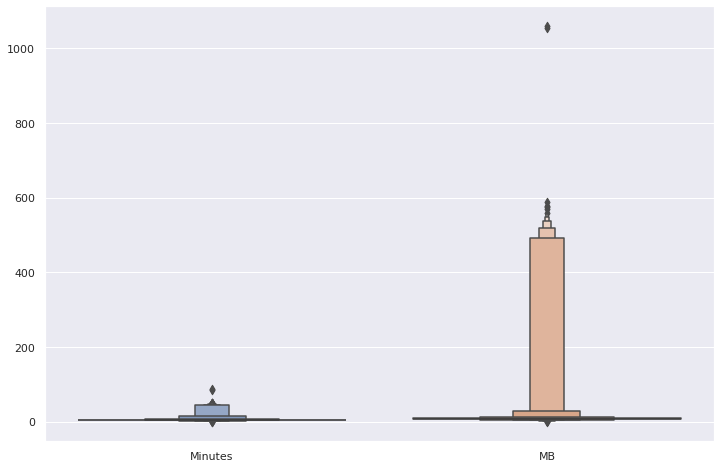

In [ ]:
# plot multiple columns at once
sns.boxenplot(data=df[['Minutes', 'MB']])

Outra maneira de tornar nosso gráfico um pouco mais fácil de ler é usar uma escala logarítmica. 

Uma escala logarítmica é organizada em potências, ou múltiplos, de 10. Veja como podemos mudar nosso eixo y para uma escala logarítmica:

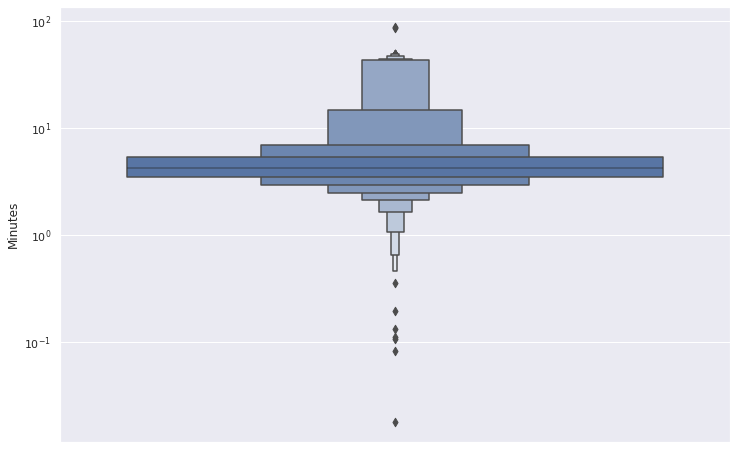

In [ ]:
sns.boxenplot(y=df['Minutes'])
#sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
plt.yscale('log')


O gráfico de escala logarítmica é um pouco mais fácil de ler (pelo menos na extremidade menor da escala) do que a versão não logarítmica.

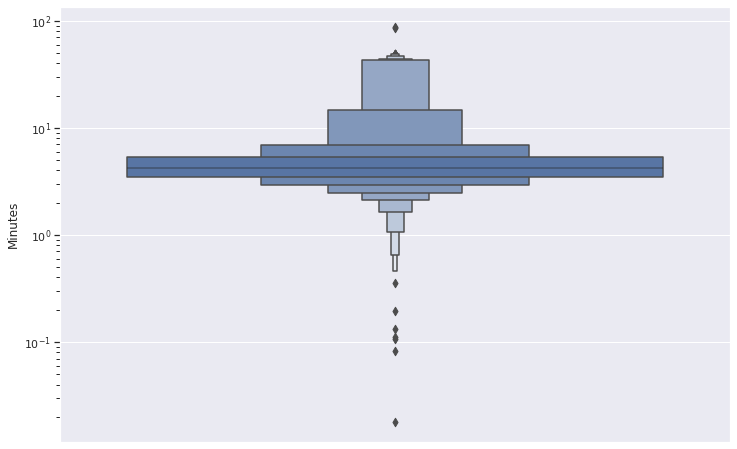

In [ ]:
sns.set(rc={"ytick.left" : True})
sns.boxenplot(y=df['Minutes'])
#sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
plt.yscale('log')

Observe que cada tique principal do eixo y é uma potência de 10. 

10^-1 é 0,1, 10^0 é 1 e 10^1 é 10. 

Os tiques menores entre as potências de 10 são os nove valores igualmente espaçados entre as potências de 10. Então, a primeira marca menor acima de 10^0 é 2, por exemplo. 

A partir disso, podemos ver que a duração média da música é de cerca de 4 a 5 minutos, o que é próximo do que esperaríamos com o conhecimento comum da música no iTunes. Também podemos confirmar isso usando `df['Minutes'].describe()`, onde vemos que a duração mediana das músicas é de 4,26 minutos

In [ ]:
df['Minutes'].describe()

count    3503.000000
mean        6.559987
std         8.916757
min         0.017850
25%         3.454683
50%         4.260567
75%         5.360750
max        88.115883
Name: Minutes, dtype: float64

Podemos observar que há músicas com tamanhos muito pequenos, discrepantes, e talvez sejam erros de cadastro.

## Atividade

Analise as idades dos dados do titanic usando boxplots e boxenplots.

https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv

Antes de gerar gráficos, descreva brevemente o que se espera ver. Qual a hipótese de distribuição?


### Resposta

In [ ]:
df_titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv')

In [ ]:
df_titanic.head()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


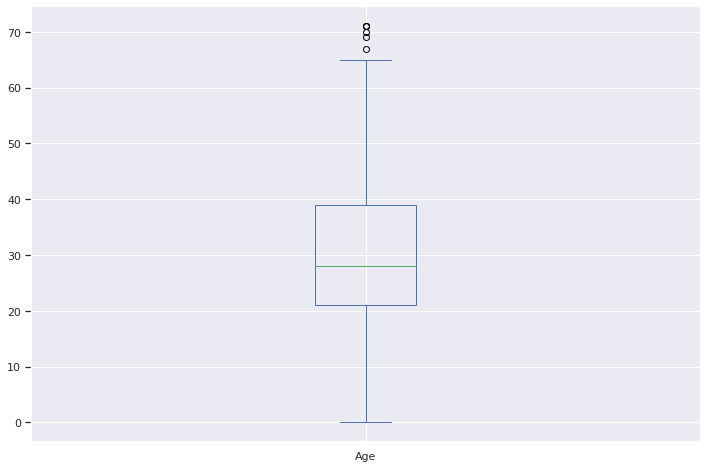

In [ ]:
df_titanic['Age'].plot.box(figsize=(12,8))


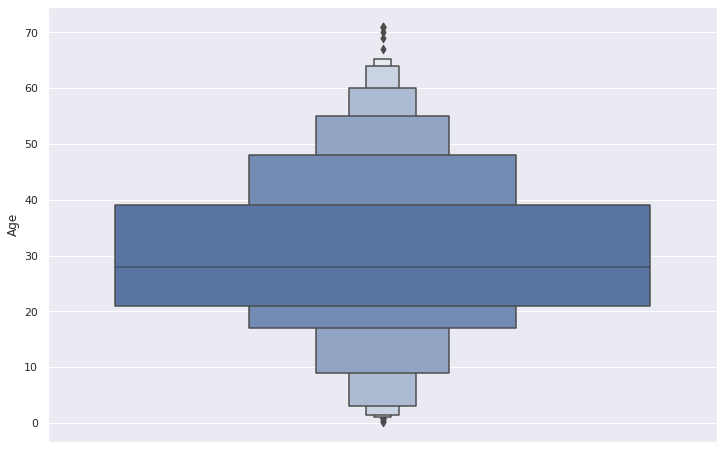

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxenplot(y=df_titanic['Age']);

## Violin Plots

Outra maneira de ver a distribuição de dados é usando histogramas e estimativa de densidade por kernel (KDE). 

Lembre-se que os histogramas agrupam os dados em barras (bins) que mostram as contagens de pontos em cada bin. 

Isso nos ajuda a ver a distribuição dos dados. 

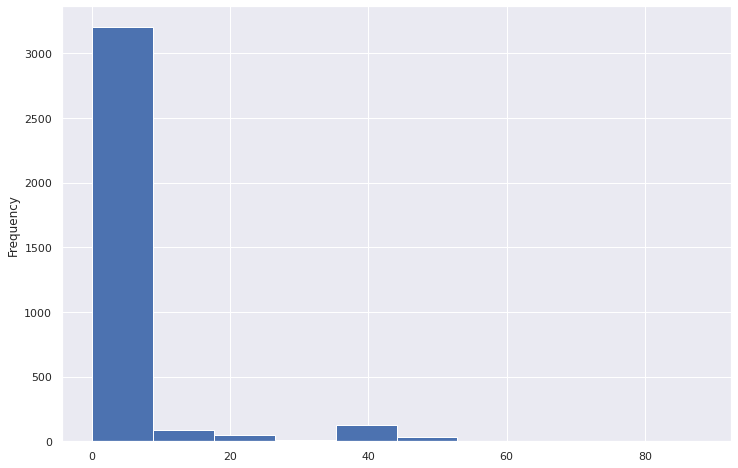

In [ ]:
df['Minutes'].plot.hist()

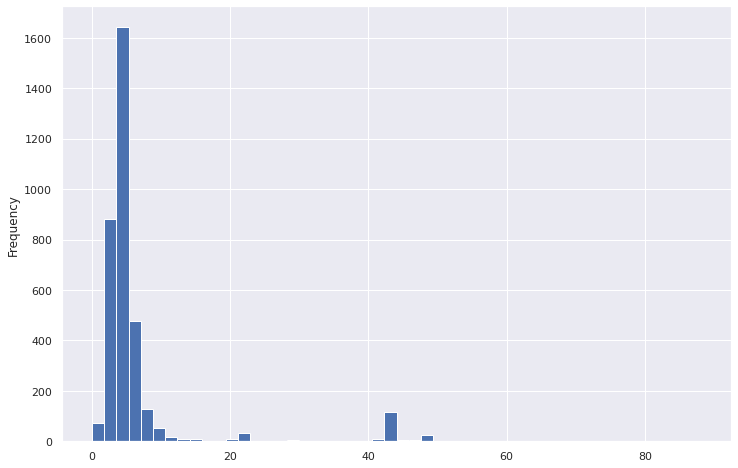

In [ ]:
df['Minutes'].plot.hist(bins=50)

O KDE basicamente ajusta uma linha à distribuição de dados e produz algo como um histograma suavizado. Podemos fazer um histograma com uma linha do KDE com seaborn usando histplot:

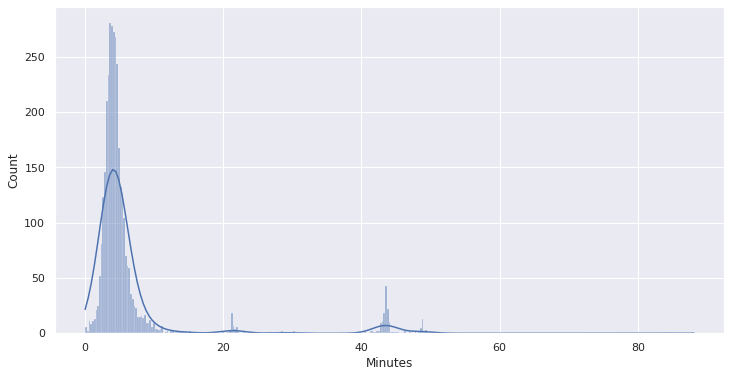

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.histplot(x=df['Minutes'], kde=True)

A função histplot desenha nosso histograma a partir dos dados fornecidos, e o argumento kde=True resulta na linha KDE. 

O gráfico resultante mostra barras que representam a densidade dos dados – barras maiores significam mais pontos. A linha é o ajuste do KDE aos dados. 



Um gráfico de violino é semelhante a este, mas mostra o KDE e um boxplot:

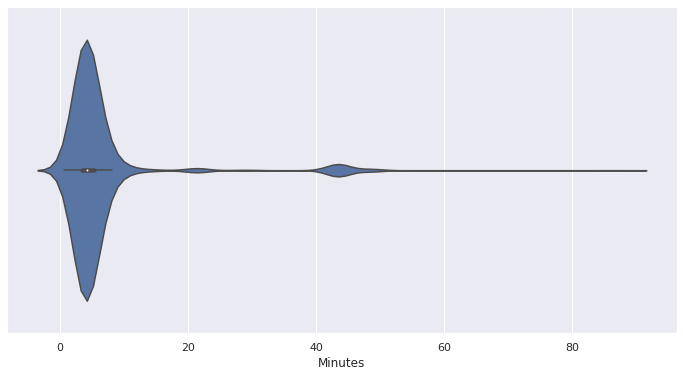

In [ ]:
sns.violinplot(data=df, x='Minutes')

Para muitas funções do mar, podemos fornecer um argumento de dados, que deve ser um DataFrame pandas. Podemos então fornecer argumentos x e y como nomes de coluna. 

Aqui, estamos mostrando apenas os dados de Minutos como o argumento x. Podemos ver que o KDE é a principal característica do gráfico, e este KDE é espelhado no eixo x. 

Também vemos um pequeno boxplot no meio da distribuição espelhada do KDE, com o ponto branco sendo a mediana, a caixa mostrando os quartis Q1 e Q3, e as linhas mostrando os limites do IQR outlier.

Vejamos alguns grupos de dados de uma só vez com um gráfico de violino. Vamos primeiro selecionar os cinco principais gêneros por número de músicas e criar um DataFrame separado apenas com esses dados:

In [ ]:
top_5_genres = df['Genre'].value_counts().index[:5]
top_5_genres

Index(['Rock', 'Latin', 'Metal', 'Alternative & Punk', 'Jazz'], dtype='object')

In [ ]:
top_5_data = data=df[df['Genre'].isin(top_5_genres)]

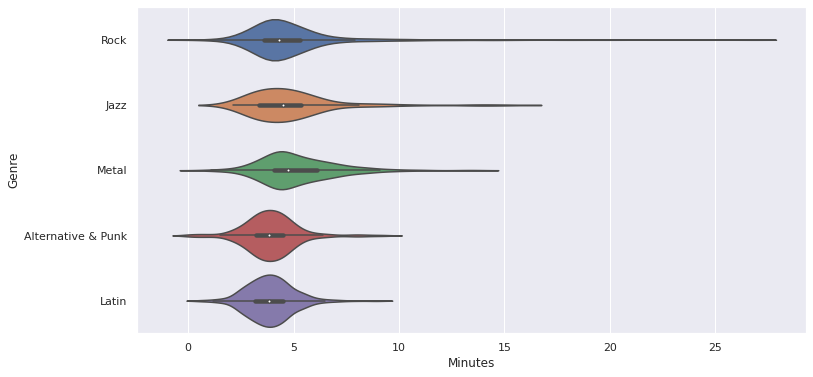

In [ ]:
sns.violinplot(data=top_5_data, x='Minutes', y='Genre')

Isso nos ajuda a ver que rock, jazz e metal têm amplas distribuições de duração de música, embora a maioria esteja perto da faixa de 3 a 5 minutos.


Violin Plot tem várias opções uteis https://seaborn.pydata.org/generated/seaborn.violinplot.html


### Gráficos semelhantes podem ser feitos com muitas outras funções no seaborn, como gráficos de valor de letra:

sns.boxenplot(data=df, x='Minutes', y='Genre').

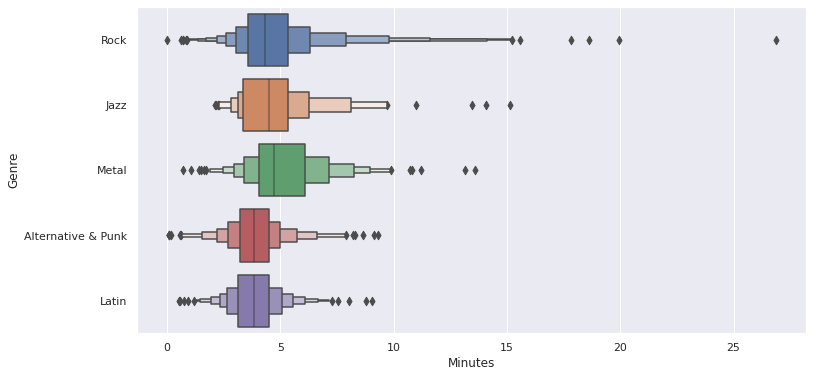

In [ ]:
sns.boxenplot(data=top_5_data, x='Minutes', y='Genre')

## Atividade



Analise as idades do titanic usando violin plots. Compare o kde de idade com a classe (PCLass). 

https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv

Antes de gerar gráficos, desescreva brevemente o que se espera ver. Qual a hipótese de distribuição?

### Resposta

In [ ]:
df_titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv')

In [ ]:
df_titanic.head()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


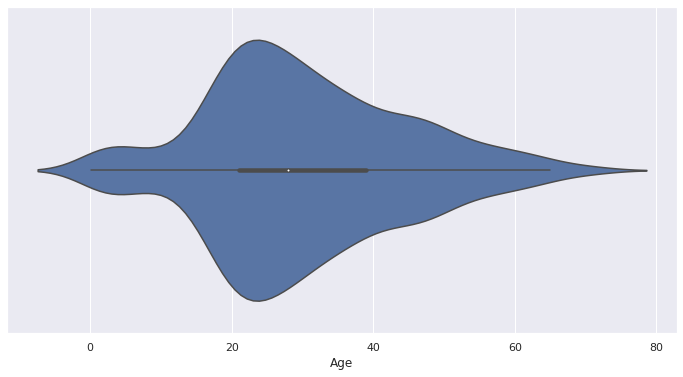

In [ ]:
sns.violinplot(data=df_titanic, x='Age')

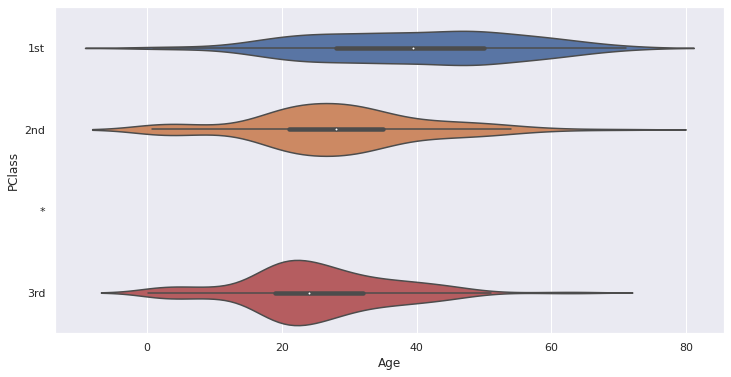

In [ ]:
sns.violinplot(data=df_titanic, x='Age', y='PClass')


## Exercício

Aplicar os gráficos dessa aula ao dataset California Housing

https://github.com/ageron/handson-ml2/tree/master/datasets/housing


## Scatter plots

Os gráficos de dispersão são um gráfico EDA essencial para dados numéricos contínuos. Dados contínuos, é claro, são dados que podem assumir qualquer valor entre dois limites, como comprimento ou temperatura. 

Vamos dar uma olhada na duração da nossa música versus tamanho em MB primeiro. 



Até agora, analisamos a plotagem de dados com pandas e seaborn, porque geralmente é mais fácil. 

No entanto, a biblioteca base matplotlib também pode ser usada para qualquer tipo de gráfico. 
* De fato, pacotes como seaborn e pandas derivam seus recursos de plotagem do matplotlib. 

Aqui está um gráfico de dispersão simples com matplotlib:

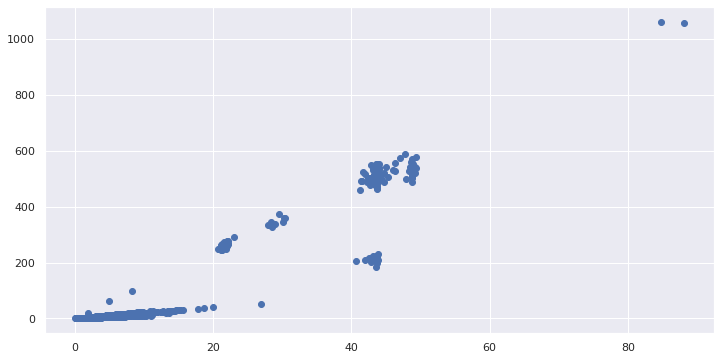

In [ ]:
plt.scatter(df['Minutes'], df['MB'])

Podemos ver que o gráfico é muito básico – os pontos e eixos são mostrados, mas não há rótulos de eixos. Para adicionar rótulos de eixos, adicionamos as linhas:

Text(0, 0.5, 'MB')

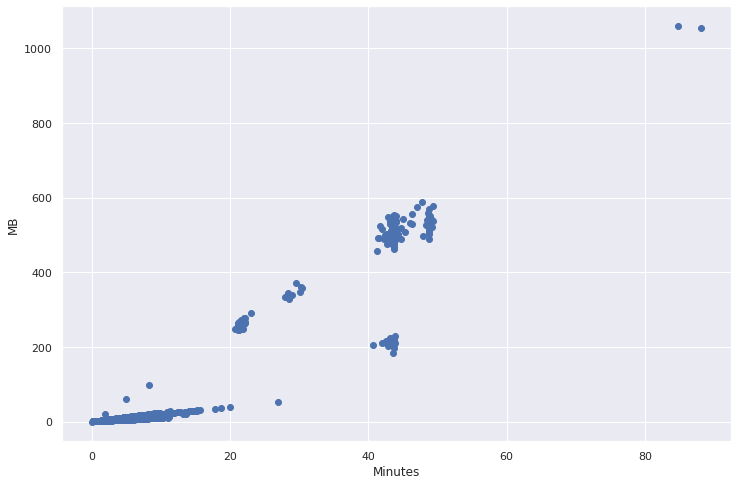

In [ ]:
plt.scatter(df['Minutes'], df['MB'])
plt.xlabel('Minutes')
plt.ylabel('MB')

Text(0, 0.5, 'MB')

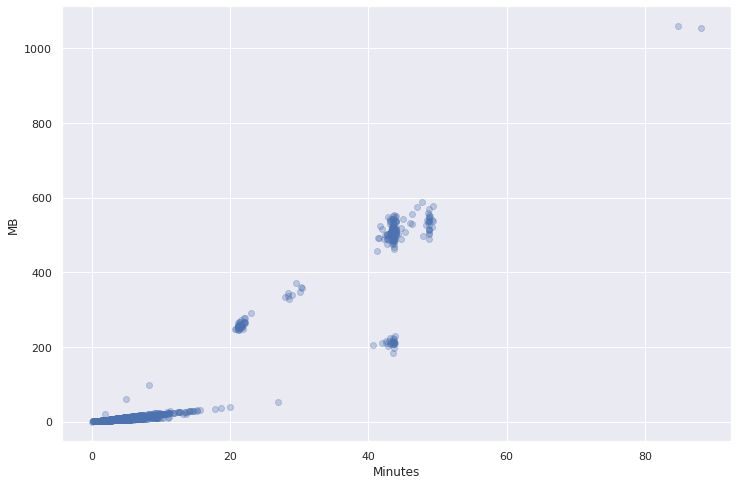

In [ ]:
plt.scatter(df['Minutes'], df['MB'], alpha=0.3)
plt.xlabel('Minutes')
plt.ylabel('MB')

Embora o matplotlib possa ser bom porque podemos personalizar cada pequeno aspecto de nossos gráficos, também pode ser difícil descobrir como ajustar perfeitamente cada parte de um gráfico.

É por isso que estou recomendando usar pacotes de nível superior como Seaborn e Plotly para fazer seus gráficos. Por exemplo, aqui está como podemos fazer um gráfico de dispersão em Seaborn:

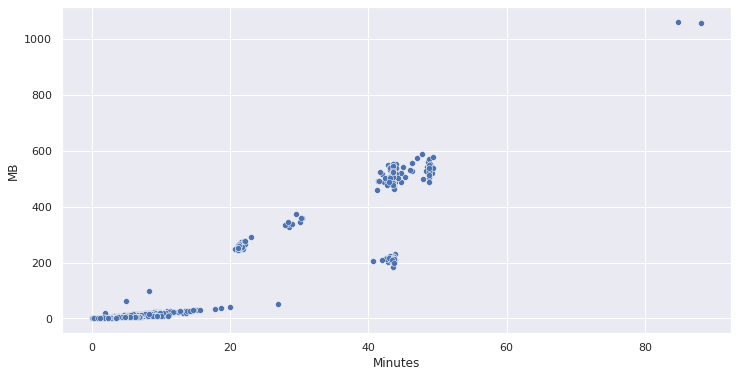

In [ ]:
sns.scatterplot(data=df, x='Minutes', y='MB')

Os pacotes Seaborn e pandas criam um gráfico de aparência decente para nós por padrão, com rótulos de eixos e alguns estilos para os pontos que os tornam um pouco mais fáceis de ler em comparação com o gráfico padrão do matplotlib.

Os plots do pacote seaborn têm um estilo diferente dos pandas e muito mais opções. Por exemplo, como na maioria dos gráficos em seaborn, podemos agrupar por uma coluna usando o argumento hue:

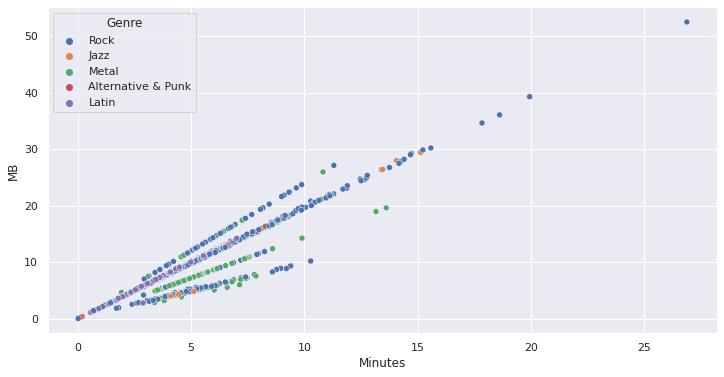

In [ ]:
sns.scatterplot(data=top_5_data, x='Minutes', y='MB', hue='Genre')

Aqui, estamos usando apenas os cinco principais gêneros por contagem de músicas para plotar em vez do conjunto de dados completo. 

Podemos ver que existem algumas inclinações diferentes de minutos versus MB nos dados. 

Isso nos diz que existem algumas diferenças significativas nas propriedades de áudio dessas diferentes faixas de áudio, levando a diferentes relações entre MB e minutos. 

Uma inclinação mais acentuada significa que existem mais dados por minuto, portanto, os pontos próximos ao canto superior esquerdo do gráfico podem ser de áudio de resolução mais alta ou podem ser músicas com mais variedade em seus sons.

## Pairplots e Correlograms

Quando temos várias colunas numéricas, pode ser útil traçar seus relacionamentos entre si.
Vamos fazer gráficos de dispersão e histogramas de nossas colunas numéricas com um comando no Seaborn:

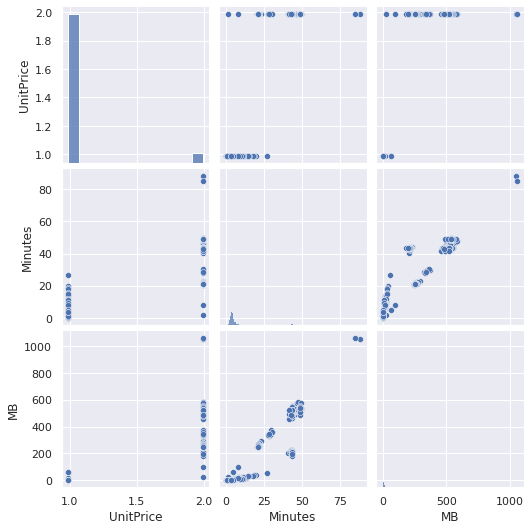

In [ ]:
sns.pairplot(data=df)

A partir deste gráfico, podemos ver rapidamente as relações entre todas as variáveis. 

A partir disso, podemos ver a mesma relação entre a duração da música e o MB que vimos em nosso gráfico de dispersão – um MB maior significa uma música mais longa em geral. 

No entanto, também vemos histogramas para cada coluna, mostrando a distribuição unidimensional dos dados. Podemos ver no canto superior esquerdo que os preços unitários são principalmente 0,99, com algumas músicas de 1,99. 

Também podemos ver que as músicas mais longas e mais caras tendem a ter um valor de MB mais alto, o que significa um arquivo de dados maior.

Embora os diagramas de pares possam ser úteis para EDA, muitas vezes queremos ver quão fortemente correlacionadas as diferentes colunas numéricas são. 

Para isso, as correlações são úteis. Lembre-se de que podemos usar df.corr() com um DataFrame pandas para obter correlações. 

Podemos simplesmente plotar isso com o mapa de calor do seaborn:

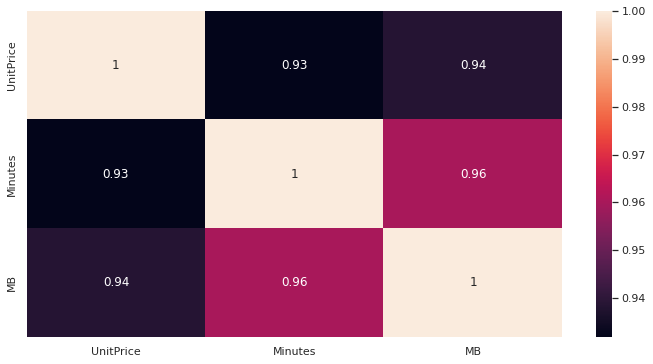

In [ ]:
sns.heatmap(df.corr(), annot=True)

A função df.corr() calcula a correlação de Pearson entre colunas numéricas. 

Isso está procurando por relacionamentos lineares e é como ajustar uma linha de melhor ajuste ao gráfico de dispersão entre duas colunas de dados. 

Se os dados estiverem perfeitamente correlacionados, eles terão uma correlação de 1. 

Usando annot=True na função sns.heatmap, temos os valores de correlação plotados em cada quadrado. 

Podemos ver que cada coluna está perfeitamente correlacionada consigo mesma, pois tem o valor 1. 

Também podemos ver que os minutos e MB de cada música estão fortemente correlacionados com o preço – músicas mais longas e maiores geralmente têm preços mais altos.

Podemos usar outros tipos de cálculos de correlação fornecendo argumentos para a função corr do pandas. 

Os outros tipos de correlações disponíveis são Spearman e Kendall. 

Ambos usam cálculos diferentes em comparação com Pearson e são mais adequados para relações não lineares. 

Podemos alterar o tipo de correlação que usamos especificando o argumento do método em df.corr():

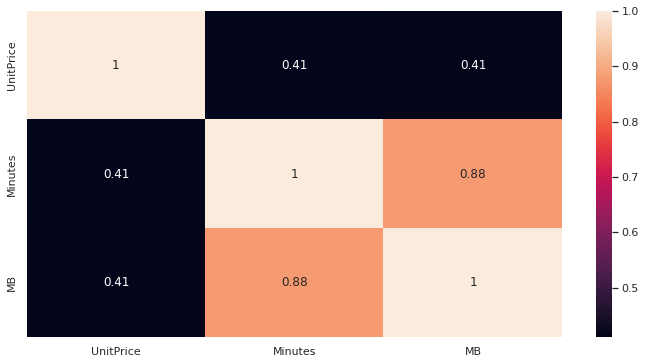

In [ ]:
sns.heatmap(df.corr(method='spearman'), annot=True)

Aqui usamos a correlação de Spearman. 

Podemos ver que ele retorna valores muito diferentes para algumas das correlações. 

Os métodos de Spearman e Kendall calculam as correlações por ordenação em vez de apenas o valor bruto. 

Os pontos são ordenação do menor para o maior para duas colunas de dados e, se as classificações de ambas as colunas aumentarem ao mesmo tempo, o valor de ordenação será alto. 

Esses métodos são bons para procurar relacionamentos entre colunas de dados não lineares. Em geral, o Spearman é executado muito mais rápido do que o Kendall, então você quase sempre deve usar Pearson ou Spearman para procurar correlações entre colunas.

## Atividade - Analise as correlações do titanic. 





https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv

Antes de gerar gráficos, desescreva brevemente o que se espera ver. Qual a hipótese de distribuição?

Tente o método kendall também


### Resposta

In [ ]:
df_titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv')

In [ ]:
df_titanic.head()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [ ]:
df_titanic.drop(columns='Unnamed: 0', inplace=True)

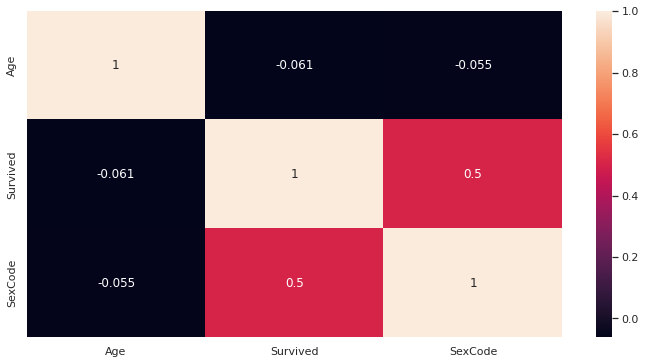

In [ ]:
sns.heatmap(df_titanic.corr(), annot=True)

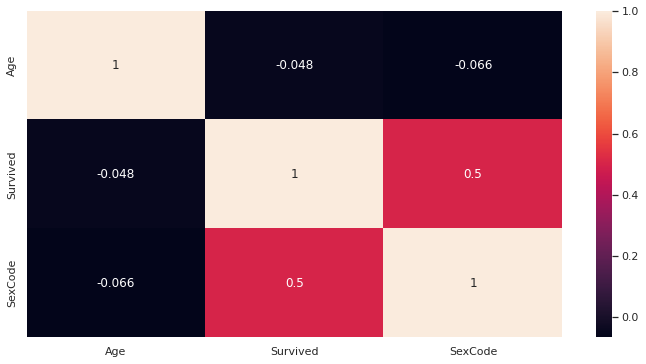

In [ ]:
sns.heatmap(df_titanic.corr(method='spearman'), annot=True)

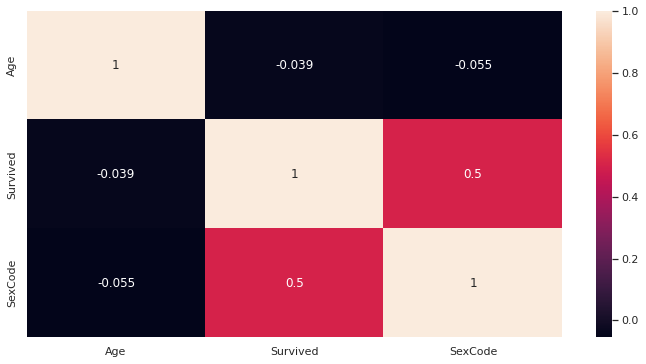

In [ ]:
sns.heatmap(df_titanic.corr(method='kendall'), annot=True)

## Plot de valores ausentes

Podemos examinar valores ausentes com pandas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Track      3503 non-null   object 
 1   Composer   2525 non-null   object 
 2   UnitPrice  3503 non-null   float64
 3   Genre      3503 non-null   object 
 4   Album      3503 non-null   object 
 5   Artist     3503 non-null   object 
 6   Minutes    3503 non-null   float64
 7   MB         3503 non-null   float64
dtypes: float64(3), object(5)
memory usage: 219.1+ KB


In [ ]:
df.isna().sum()

Track          0
Composer     978
UnitPrice      0
Genre          0
Album          0
Artist         0
Minutes        0
MB             0
dtype: int64

Um pacote que facilita fazer isso está faltando no. Isso está disponível via conda ou pip e pode ser instalado com conda install -c conda-forge missingno -y ou pip install missingno. Podemos fazer um gráfico dos valores ausentes em nosso conjunto de dados da seguinte forma:

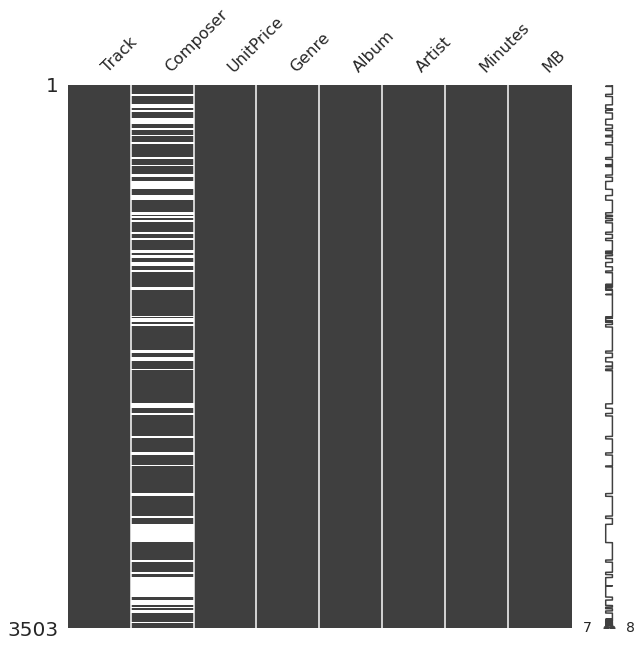

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(10, 10))

Isso mostra uma matriz de valores presentes em cinza e valores ausentes em branco. 

Cada linha é uma linha em cada coluna. A partir disso, vemos que a coluna Composer tem vários valores ausentes, mas nenhuma das outras colunas está faltando nenhum valor. 

A linha de centelha no lado direito mostra o total de valores ausentes em todas as colunas para cada linha e mostra o número máximo e mínimo de valores completos para as linhas. 

No nosso caso, 7 significa que o número mínimo de valores presentes em uma linha é 7 e o número máximo de valores presentes em uma linha é 8.

In [ ]:
df_modificado = df.copy()

In [ ]:
import math

df_modificado.loc[1000:1020, 'UnitPrice'] = math.nan

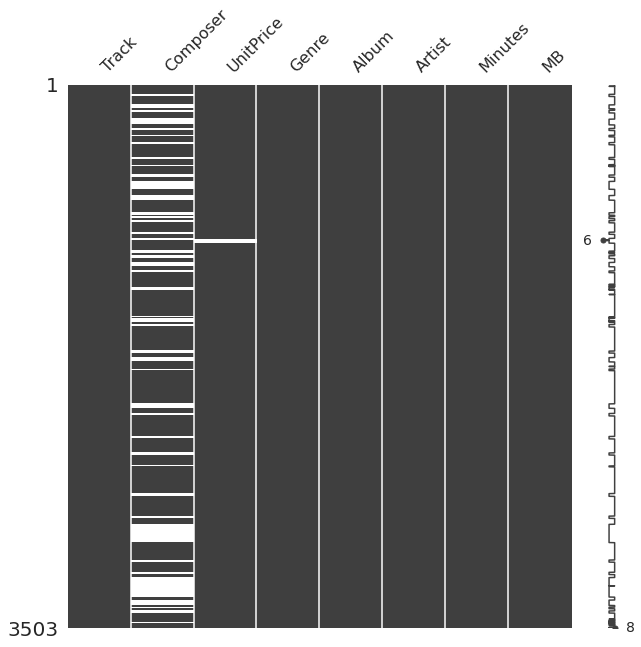

In [ ]:
msno.matrix(df_modificado, figsize=(10, 10))

Quase todos os pacotes modernos do Python têm uma página no GitHub com mais documentação. Podemos ver a documentação (abreviada como "docs") para missingno aqui: https://github.com/ResidentMario/missingno.

## (Opcional) EDA packages - pandas-profiling

Às vezes, é útil criar alguns gráficos e estatísticas de EDA específicos para investigar recursos de interesse, mas geralmente é útil executar um pacote de EDA automático em nossos dados como um de nossos primeiros passos. 

Há uma série de pacotes EDA diferentes em Python (e R), mas vamos nos ater apenas à criação de perfis de pandas. 

Este é um pacote conveniente que cria um resumo EDA com apenas algumas linhas de código de um DataFrame pandas. Depois de carregarmos nossos dados, carregamos a função ProfileReport do pandasprofiling:

In [ ]:
pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 5.1 MB/s 
     |████████████████████████████████| 102 kB 45.0 MB/s 
     |████████████████████████████████| 690 kB 60.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 9.9 MB 1.7 MB/s 
     |████████████████████████████████| 4.7 MB 35.3 MB/s 
     |████████████████████████████████| 296 kB 37.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=551a3e3c33c12bb46709061f3d3f680454e8cb581e27099b4b5f8fdbe17cde2c
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
    

In [ ]:
from pandas_profiling import ProfileReport

Uma vez carregado, podemos criar nosso relatório
e exibi-lo:

In [ ]:
report = ProfileReport(df)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Podemos ver que a página padrão do relatório nos mostra algumas estatísticas gerais dos dados: o número de colunas (variáveis), linhas (observações), estatísticas sobre valores ausentes e duplicados e os tipos de variáveis (categóricas/string e numéricas).

As outras duas subguias na visão geral mostram 
* Warnings, que são voltados para nos alertar sobre possíveis problemas com os dados para aprendizado de máquina, e 
* Reproduction, que tem notas sobre a data e hora em que o relatório foi executado e a versão de criação de perfil de pandas. Isso permite que alguém reproduza o relatório mais tarde. 

Podemos ver em Warnings que várias colunas têm muitos valores exclusivos (alta cardinalidade). Isso dificulta a análise e o aprendizado de máquina porque é difícil encontrar padrões entre os dados compostos principalmente de valores exclusivos. 

Os outros avisos são altas correlações entre colunas e alguns valores ausentes. 
* Valores ausentes são sempre um problema porque podem significar erros na coleta de dados e precisamos decidir como lidar com os valores ausentes. 
* Altas correlações significam que precisamos apenas de uma ou algumas das variáveis ​​altamente correlacionadas em um modelo preditivo, pois elas contêm informações redundantes. 



A próxima guia principal é Variables, que contém um resumo de cada uma das colunas. 

Quanto a coluna Track podemos ver algumas descrições/avisos dos dados no canto superior esquerdo – ALTA CARDINALIDADE (muitos valores únicos) e UNIFORME, o que significa que está próximo de uma distribuição uniforme. 
* Uma distribuição uniforme é distribuída igualmente em todos os valores. Para variáveis ​​de texto/categóricas, isso significa que quase todos os valores são exclusivos. 
* Também podemos ver no resumo de valores à direita que este é provavelmente o caso porque os valores únicos são muito dispersos – cada título de música parece aparecer quatro ou cinco vezes no máximo, e a maioria dos títulos de música na tela são agrupados na categoria Outros valores. 
  * Para dados numéricos, esse aviso significa que os dados seriam distribuídos quase igualmente em seu intervalo. 
* Clicando em "Details", vemos a aba visão geral e a coluna Unique mostra a quantidade de valores únicos e seu percentual. 
* A aba Categories mostra os valores únicos mais comuns e o percentual de cada um no dataset. 
* Por fim, a guia Lenght mostra algumas estatísticas gerais sobre o comprimento das strings nesta coluna (como comprimento médio e mediano) e mostra um histograma do número de caracteres em cada valor. Poderíamos gerar o mesmo histograma assim: `df['Track'].str.len().plot.hist(bins=50)`

Vejamos a seguir um resumo de uma coluna de dados numéricos selecionando Minutos:

* Podemos ver que essa visualização fornece avisos sob o nome da variável, assim como na coluna Tracks. 
* Aqui, vemos o aviso HIGH CORRELATION, o que significa que esta coluna tem uma alta correlação com pelo menos uma outra coluna. Isso pode ser importante para métodos de aprendizado de máquina, porque podemos querer manter apenas uma das colunas altamente correlacionadas em nosso modelo. 
* Também vemos um resumo das estatísticas na parte superior do painel. Novamente, ele mostra valores únicos e ausentes, mas aqui também mostra o número e o percentual de valores que são infinitos. 
* Algumas outras estatísticas básicas também são mostradas lá, como a média/média, mínimo e máximo. Também temos um histograma desenhado para nós no canto superior direito.
* Clicar no botão Details nos mostra muitas estatísticas mais detalhadas. 
  * Podemos ver que a coluna da esquerda das estatísticas está relacionada a quantis (quartis incluindo Q1 e Q3) como vimos antes. 
  * As estatísticas do lado direito são principalmente sobre a forma da distribuição. 
  * Por exemplo, a Skewness (assimetria) nos mostra quão assimétrica é a distribuição – quanto maior a assimetria, mais assimétrica é a distribuição. 
  * A última estatística nesta coluna, Monotocity, descreve se os valores são monotônicos. Se os valores são monótonos, significa que eles sempre aumentam ou sempre diminuem à medida que avançamos nos dados. Nesse caso, é calculado observando como os dados mudam em relação ao índice. Portanto, nossos dados precisariam aumentar constantemente à medida que descemos as linhas para aumentar monotonicamente.
* As outras subguias na área de detalhes são Histograma, Valores comuns e Valores extremos. 
  * O histograma simplesmente nos mostra uma versão maior do histograma no canto superior direito. 
  * A seção Valores comuns mostra os 10 principais valores comuns e a porcentagem dos dados que eles compõem. Se virmos um valor estranho que aparece com frequência, como -999, isso pode significar que temos dados ausentes representados por -999, por exemplo. 
  * Por fim, a seção Valores extremos mostra os cinco valores superiores e inferiores.

Algumas das outras guias de nível principal disponíveis são Interações, Correlações, Valores ausentes e Amostra. 
* A seção Interações mostra um mapa de calor de variáveis numéricas. Por exemplo, mostra minutos versus MB, e a ideia é que você veja a densidade dos pontos e como eles se relacionam. 
  * É como um gráfico de dispersão, mas os valores são agrupados em caixas hexadecimais
  * Como temos alguns grandes valores discrepantes, esse gráfico de interação não funciona muito bem aqui. Os outliers aparecem como caixas hexadecimais fracas no meio e no canto superior direito do gráfico. 
  

### Abas Correlations, Missing Values e Sample

A próxima guia geral no relatório de criação de perfil do pandas, a seção Correlations, mostra um correlograma entre valores numéricos, exatamente como criamos antes com sns. heatmap(df.corr()). 
* Existem subguias para diferentes métodos de correlação, como Spearman, sobre os quais falamos antes.
* Outro método de correlação, phi-k, está disponível em uma subguia. Este é um método de correlação mais recente que também inclui as variáveis categóricas que não possuem uma distribuição uniforme.

A seção Missing Values mostra alguns gráficos de valores ausentes. 
* Um é o gráfico de matriz de valor ausente que criamos antes com msno.matrix(df), 
* outro é um gráfico de barras mostrando os valores ausentes para cada variável e 
* o último é um dendrograma de valores ausentes:
  * O dendrograma é um tipo de algoritmo de agrupamento e desenha uma árvore. 
  * Aqui, a árvore tem apenas um nível de profundidade, pois apenas uma coluna está com valores ausentes (a coluna Composer). 
  * A árvore começa no topo e conecta as colunas com o número mais semelhante de valores ausentes com linhas horizontais. 
  * Em seguida, esses valores conectados têm uma linha vertical traçada até o próximo nível, onde os grupos com o número mais semelhante de valores ausentes são agrupados com uma linha horizontal. 
  * Na parte inferior da árvore, todas as colunas são conectadas em uma única linha horizontal. 
  * No nosso caso, todas as colunas, exceto o Composer, não têm valores ausentes, portanto, elas são conectadas primeiro no nível superior da árvore. 
  * A coluna Composer é independente, pois é a única coluna com valores ausentes. Então, no próximo nível abaixo, esses dois grupos são unidos, pois cada vez que descemos um nível na árvore, somos obrigados a unir os dois grupos que possuem o número mais semelhante de valores ausentes.

A última seção é Sample, que simplesmente mostra algumas das primeiras e últimas linhas dos dados, assim como com df.head() e df.tail(). 
* Assim, podemos ver que o pandas-profiling automatiza muitas etapas para nós – verifica as correlações entre as variáveis, faz gráficos de valores ausentes e assim por diante. 
* No entanto, às vezes queremos criar alguns gráficos EDA extras ou precisamos personalizar gráficos. 
* Embora geralmente seja melhor começar com o pandas-profilling se seus dados não forem muito grandes, também ajuda a criar alguns gráficos EDA adicionais, como fizemos anteriormente.

### Exercício - dataset de vendas

Analise o dataset de vendas abaixo usando o pandas-profiling

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Clothing.csv

A descrição do dataset está em https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Clothing.html


#### Resposta

# Práticas ruins de visualização

Slides "Como dados podem manipular a realidade"

# Práticas recomendadas de visualização

Fazer boas visualizações é como contar uma boa história. Precisamos ter um enredo coerente, que seja interessante, que a mensagem seja clara e que seja adequada ao nosso público. 

Com visualizações, vários aspectos entram em jogo:

* Apresentação de dados
* Cor
* Texto
* Eixos
* Rótulos

Usaremos esses componentes para criar algumas diretrizes de práticas recomendadas:

1. Evite lixo gráfico
2. Use as cores com sensatez
3. Apresente os dados corretamente
4. Faça gráficos "redundantes" caso sejam impressos em preto e branco
5. Rotule claramente eixos e conjuntos de dados e use um único tamanho de fonte com uma fonte sem serifa
6. Adapte suas visualizações ao público

## 1 . Evite lixo gráfico




Na maioria das vezes, queremos manter nossos gráficos o mais simples possível, a menos que estejamos em uma situação especial em que nossa mensagem seja que os dados são complicados. 
* Adicionar componentes extras aos gráficos, como gráficos bregas ou muitas anotações, é chamado de "lixo de gráfico".
* O lixo gráfico comum inclui linhas de grade, gradientes de cores, efeitos 3D, planos de fundo gráficos e sombreamento ornamental.

Em quase todos os casos, você deve evitar efeitos 3D. 
* Por exemplo, o Microsoft Excel permite todos os tipos de efeitos 3D, como transformar um gráfico de barras em 3D, mas não precisamos fazer isso – simplesmente não é necessário. 
* Isso nos leva à primeira prática recomendada: evitar lixo gráfico. 
* O Microsoft Excel geralmente adiciona algum lixo de gráfico por padrão: sempre adiciona uma borda ao gráfico e às linhas de grade. 
* Geralmente não precisamos de linhas de grade e elas adicionam desordem. No entanto, se as linhas de grade ajudarem a transmitir melhor o significado dos dados, elas poderão ser incluídas. 
* O padrão para um gráfico de barras 3D no Microsoft Excel é mostrado na figura abaixo, rotulada (a). Estamos traçando as contagens de valor dos cinco principais gêneros em nosso conjunto de dados do iTunes.

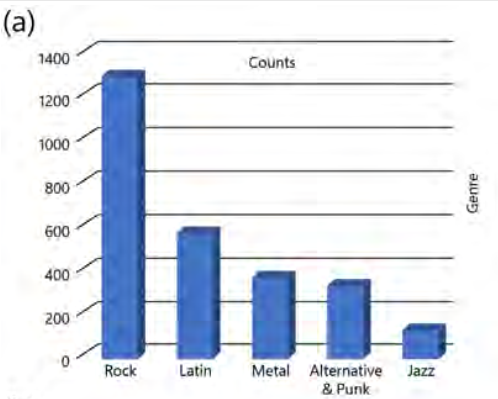

Podemos ver que o efeito 3D não adiciona nada ao gráfico além de dificultar a leitura. As linhas de grade às vezes podem ajudar se quisermos transmitir valores específicos ao nosso público, mas não são necessárias aqui (ou na maioria das vezes).

A borda delineada do plot também adiciona lixo. Compare isso com (b), onde criamos um gráfico com pandas:

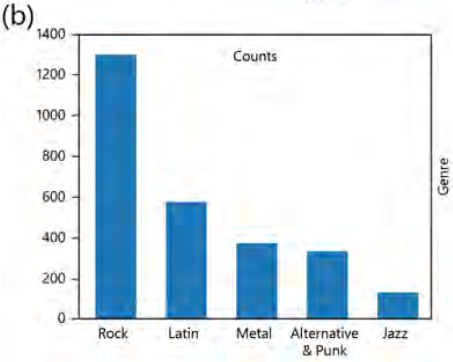

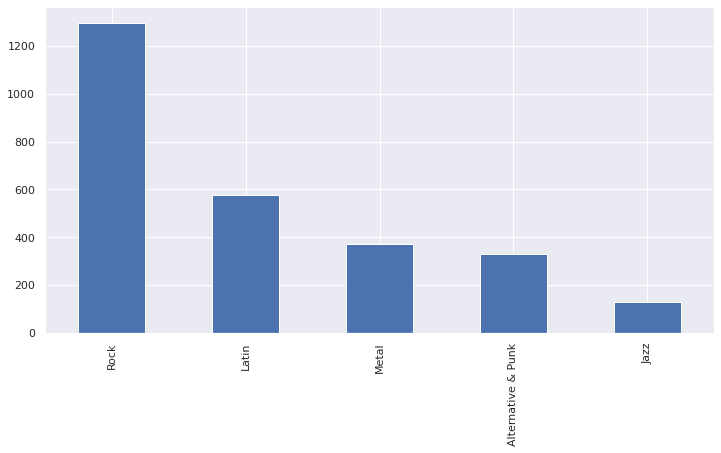

In [ ]:
df['Genre'].value_counts()[:5].plot.bar()

Podemos ver que pandas (que usa matplotlib) não adiciona linhas de grade ou uma borda de gráfico, mas adiciona linhas de eixos que formam uma borda ao redor do gráfico. Ele também não mostra rótulos de eixos, mas podemos adicionar um rótulo de eixo x com plt.xlabel('Genre').

Text(0.5, 0, 'Genre')

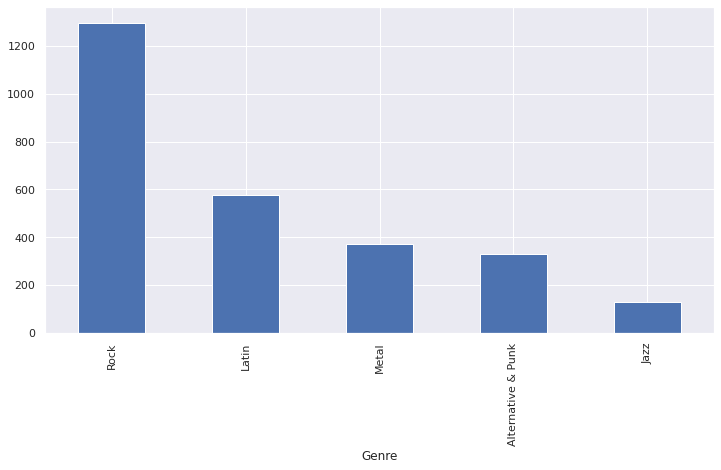

In [ ]:
df['Genre'].value_counts()[:5].plot.bar()
plt.xlabel('Genre')

Por fim, em (c) e (d), temos um plot feito com Seaborn:

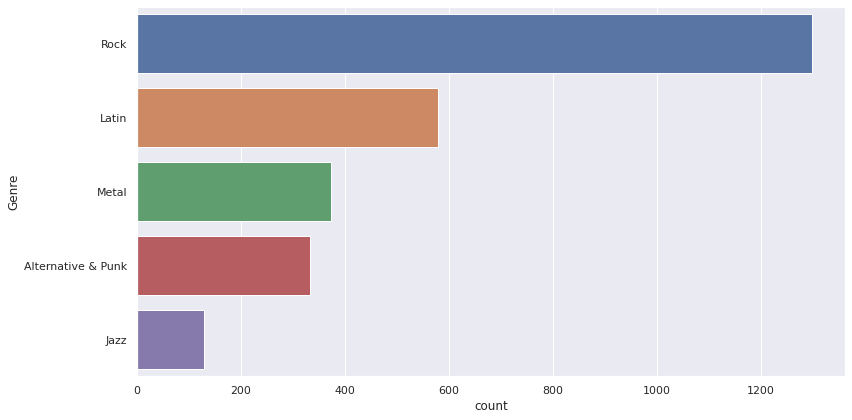

In [ ]:
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index[:5])
plt.tight_layout()

Isso requer uma chamada de função mais complexa.
* Damos nosso DataFrame, df, como o argumento de dados e, em seguida, selecionamos a coluna Gênero com o argumento y. Isso faz com que nossas barras fiquem horizontais. 
* Em seguida, definimos a ordem das barras para serem os cinco principais gêneros por contagem de valor com o argumento order. 


## 2 . Use cores com sensatez

Na opção abaixo nós definimos o argumento color como 'darkblue' para que todas as barras tenham uma única cor. Sem isso, cada barra é definida com uma cor diferente por padrão, conforme mostrado em (c). 
  * As cores não nos dizem nada de novo aqui, então não precisamos delas – já temos os rótulos de Gênero do eixo y. Das visualizações acima, a melhor é o gráfico Seaborn no canto inferior direito, (d).

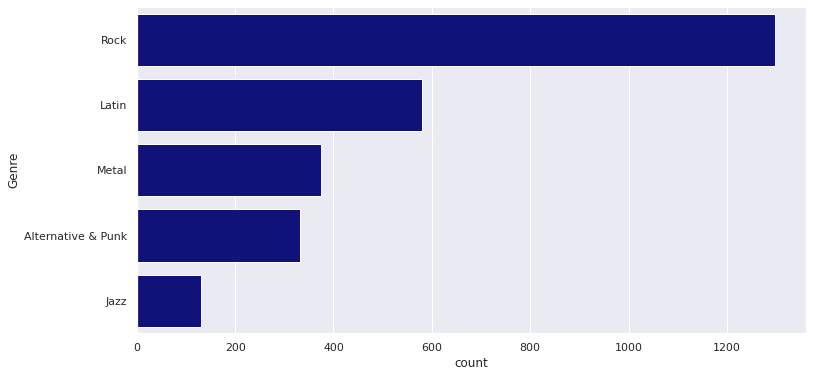

In [ ]:
import seaborn as sns
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index[:5], color='darkblue')

A comparação de (c) e (d) acima nos leva à segunda melhor prática de visualização: use cores com sensatez. 
* Podemos ver em (c) que as cores não estão nos dizendo nenhuma informação nova e se tornam desordem. 
* Outro problema aqui, que é comum com conjuntos de cores padrão, é que vermelho e verde são usados juntos. Isso deve ser evitado devido aos 5% a 10% da população que tem algum tipo de daltonismo. 
  * O daltonismo vermelho-verde é comum, o que torna difícil distinguir as combinações de cores vermelho e verde nos gráficos. 
  * Se vermelho e verde devem ser usados, usar cores com tons mais claros e mais escuros pode ajudar. Para gradientes de cores, os mapas de cores viridis e cividis podem ser usados.

Se estivermos simplesmente fazendo um gráfico de barras como acima, uma única cor será suficiente. 
* Muitas vezes, o azul escuro é uma boa escolha de cor – é a escolha de cor para muitas organizações e empresas, como IBM, American Express, Lowes, Intel, GE, PayPal e muitas outras. 
* O azul escuro parece ser uma cor que nos dá a impressão de confiança e profissionalismo.

Em um caso em que queremos usar várias cores, elas devem ser usadas para transmitir uma nova dimensão dos dados. Por exemplo, poderíamos usar a cor das barras para exibir qual país comprou esse gênero com mais frequência em nosso conjunto de dados do iTunes. No entanto, usar cores para exibir um valor contínuo nem sempre é uma boa ideia. Isso ocorre porque a cor é difícil de distinguir em um gradiente, o que nos leva à nossa próxima prática recomendada: apresentar os dados corretamente.

## 3 . Apresentar os dados corretamente

Este princípio é um pouco amplo, mas significa que devemos escolher os métodos adequados para apresentar nossos dados. 
* Por exemplo, poderíamos mostrar um gráfico de pizza das contagens de valor dos gêneros, mas os gráficos de pizza e donuts geralmente são desaprovados. 
  * Isso ocorre porque é difícil comparar o tamanho de arcos ou fatias de uma torta, e é muito mais fácil comparar o comprimento das barras. 
  * Também poderíamos apresentar dados como círculos ou bolhas, mas, novamente, é difícil comparar as áreas dos círculos entre si. 

Na maioria das vezes, podemos fazer uso de alguns gráficos:
* Gráficos de barras - para dados categóricos
* Histogramas – para distribuição de valores contínuos
* Gráficos de linha - para séries temporais
* Gráficos de dispersão - para relações entre duas variáveis contínuas
* Mapas de calor - para relacionamentos entre duas variáveis contínuas e
correlações

Os exemplos para cada um dos gráficos acima não são abrangentes, mas dão uma ideia de alguns dos tipos de dados para os quais esses gráficos são comumente usados. 
* Existem, é claro, muitos outros gráficos que poderíamos usar, como gráficos de área empilhada (stacked area charts). Muitas vezes, eles são derivados de um dos gráficos mais simples listados acima. 
* Gráficos estatísticos mais técnicos, como boxplots e letter-value, não são frequentemente usados para apresentar dados para pessoas não técnicas, pois precisaríamos explicar como ler o gráfico e o que ele significa. 
* Gráficos mais simples, como gráficos de barras, linhas e dispersão, são fáceis de entender intuitivamente.

Como vimos acima,
* as contagens de categorias funcionam bem em um gráfico de barras, e
* vimos anteriormente que os histogramas funcionam bem para observar a distribuição geral de dados numéricos (como a coluna Minutos). 
* Os gráficos de dispersão são bons para procurar relacionamentos entre dois conjuntos de dados numéricos e 
* os mapas de calor são bons para a mesma ideia, mas com conjuntos de dados maiores em que o número de pontos torna difícil ver o que está acontecendo em um gráfico de dispersão.

Os gráficos de linhas geralmente são adequados para dados de séries temporais. 
* Por exemplo, podemos coletar a soma cumulativa das vendas dos três principais países em nosso conjunto de dados do iTunes. 
* As etapas a seguir também podem ser realizadas com uma consulta SQL, mas usaremos pandas aqui. 

Primeiro, carregamos os dados:

Vamos baixar o arquivo chinook.db de https://github.com/PacktPublishing/Practical-Data-Science-with-Python/tree/main/5-Chapter-5/data

In [ ]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///chinook.db')
#engine = create_engine('sqlite://raw.githubusercontent.com/PacktPublishing/Practical-Data-Science-with-Python/main/5-Chapter-5/data/chinook.db')

with engine.connect() as connection:
    df_invoices = pd.read_sql_table('invoices', connection)

Aqui, estamos nos conectando ao nosso banco de dados Chinook SQLite3 e, em seguida, lendo toda a tabela de faturas. 

In [ ]:
df_invoices.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


In [ ]:
df_invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceId          412 non-null    int64         
 1   CustomerId         412 non-null    int64         
 2   InvoiceDate        412 non-null    datetime64[ns]
 3   BillingAddress     412 non-null    object        
 4   BillingCity        412 non-null    object        
 5   BillingState       210 non-null    object        
 6   BillingCountry     412 non-null    object        
 7   BillingPostalCode  384 non-null    object        
 8   Total              412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB


In [ ]:
df_invoices.groupby('BillingCountry').sum().sort_values(by='Total', ascending=False)[:3]

,InvoiceId,CustomerId,Total
BillingCountry,,,
USA,19103,2002,523.06
Canada,11963,1309,303.96
France,7168,1435,195.10


Primeiro, obtemos os três principais países por valores totais de vendas. 
* Aqui, agrupamos por país e fazemos a soma de todas as colunas. 
* Em seguida, classificamos os valores resultantes do maior para o menor pela coluna Total. 
* Para obter os nomes dos países, pegamos os três primeiros valores

In [ ]:
top_3_countries = df_invoices.groupby('BillingCountry').sum(). \
  sort_values(by='Total', ascending=False)[:3].index.values

Por fim, obtemos o índice (que contém os nomes dos países) e, em seguida, obtemos os valores como um array NumPy. 
* Esta última etapa pode ser feita de algumas maneiras diferentes, como primeiro obtendo o índice e os valores e depois indexando para obter os três primeiros valores. 
  * Tente dividir as etapas em partes menores e executá-las no Jupyter Notebook para ver o que está acontecendo em cada etapa. 
  * Por exemplo, tente executar sql_df.groupby('BillingCountry').sum(), adicione a função sort_values() e adicione as próximas etapas de seleção e indexação uma a uma.

In [ ]:
top_3_countries

array(['USA', 'Canada', 'France'], dtype=object)

Assim que tivermos os três principais países por vendas, poderemos obter suas vendas acumuladas ao longo do tempo. Isso é, novamente, um pouco complexo

Primeiro, precisamos definir a data como nosso índice para que possamos agrupar por data.

In [ ]:
df_invoices.index

RangeIndex(start=0, stop=412, step=1)

In [ ]:
df_invoices.set_index('InvoiceDate', inplace=True) # só pode rodar uma vez

In [ ]:
df_invoices.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-06',
               '2009-01-11', '2009-01-19', '2009-02-01', '2009-02-01',
               '2009-02-02', '2009-02-03',
               ...
               '2013-11-08', '2013-11-13', '2013-11-21', '2013-12-04',
               '2013-12-04', '2013-12-05', '2013-12-06', '2013-12-09',
               '2013-12-14', '2013-12-22'],
              dtype='datetime64[ns]', name='InvoiceDate', length=412, freq=None)

In [ ]:
gb = df_invoices[df_invoices['BillingCountry'].isin(top_3_countries)]. \
        groupby(
            [pd.Grouper(freq='M'), 'BillingCountry']
            ).sum().groupby(level=-1).cumsum()

Observe que, como o comando é uma longa linha de código, estamos quebrando as linhas e usando uma barra para continuar a mesma linha lógica de código, mas na próxima linha de texto. 
* Filtramos o DataFrame para que tenhamos apenas os três principais países com sql_df[sql_df['BillingCountry'].isin(top_3_countries)].
* Em seguida, agrupamos por mês do índice e, em seguida, o país. 
  * Isso requer o uso da função pd.Grouper() para agrupar uma série temporal por uma unidade como meses. 
* Em seguida, obtemos a soma das colunas com sum(), para que cada par data-país exclusivo tenha um valor numérico. 
* Em seguida, para obter a soma acumulada ao longo do tempo para cada país, usamos groupby() novamente com level=-1. 
  * Os resultados da primeira instrução groupby() estão em um DataFrame pandas multiíndice e level=-1 instrui groupby() a usar o segundo índice, que é o nome do país. 
* Em seguida, pegamos a soma cumulativa com cumsum(), significando que cada valor é adicionado ao próximo no tempo, começando na primeira data. 
* Novamente, tente dividir cada uma das etapas e executá-las para ver o que está acontecendo com mais clareza. 
* Isso acaba nos dando um DataFrame onde temos uma data e país como índices, e a soma cumulativa das colunas como valores.

In [ ]:
gb

InvoiceId  CustomerId   Total
InvoiceDate BillingCountry                               
2009-01-31  Canada                  4          14    8.91
            USA                     5          23   13.86
2009-02-28  France                 17          82    5.94
            USA                    18          39   14.85
2009-03-31  Canada                 22          45   17.82
...                               ...         ...     ...
2013-10-31  USA                 17477        1913  514.15
2013-11-30  France               7168        1435  195.10
            USA                 17882        1933  515.14
2013-12-31  Canada              11963        1309  303.96
            USA                 19103        2002  523.06

[108 rows x 3 columns]

Nossa coluna Total, que originalmente era o total de cada fatura individual, agora é a soma cumulativa dos valores totais da fatura, agrupados por mês e país. 



Por fim, redefinimos o índice para que a data e o país se tornem colunas que podemos usar em nosso gráfico.

In [ ]:
gb.reset_index(inplace=True)

In [ ]:
gb.head()

,InvoiceDate,BillingCountry,InvoiceId,CustomerId,Total
0,2009-01-31,Canada,4,14,8.91
1,2009-01-31,USA,5,23,13.86
2,2009-02-28,France,17,82,5.94
3,2009-02-28,USA,18,39,14.85
4,2009-03-31,Canada,22,45,17.82


Por fim, podemos plotar nossos dados:

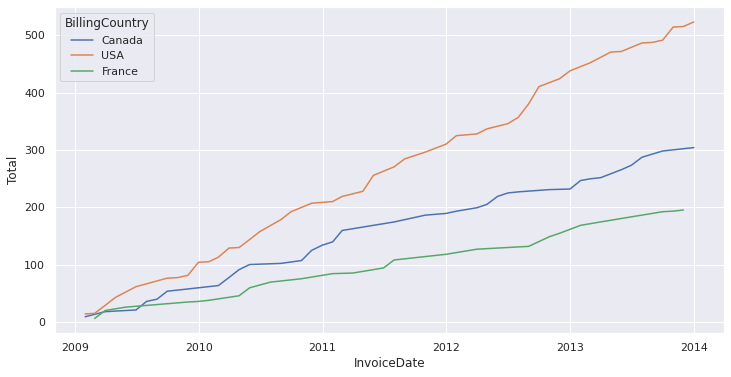

In [ ]:
sns.lineplot(data=gb, x='InvoiceDate', y='Total', hue='BillingCountry')

## 4 . Faça gráficos redundantes

No entanto, e se o gráfico for impresso em preto e branco? 
 * O resultado de uma transformação em tons de cinza é mostrado abaixo. 


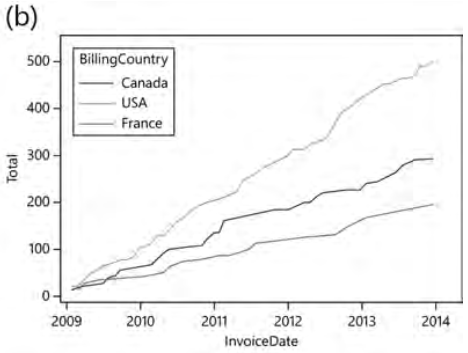

 * Podemos ver que não é fácil distinguir entre as várias linhas. 
 * Existem algumas maneiras de combater isso fazendo gráficos redundantes. Isso ajuda na impressão em preto e branco, bem como para os daltônicos. 
 * Nossa solução para tornar os gráficos redundantes é adicionar outro recurso a cada linha. 
 * Podemos fazer as linhas com texturas diferentes (como tracejado, pontilhado e assim por diante) ou podemos rotular diretamente as linhas. 
 * Aqui está como poderíamos fazer as linhas tracejadas, o que é mostrado abaixo:

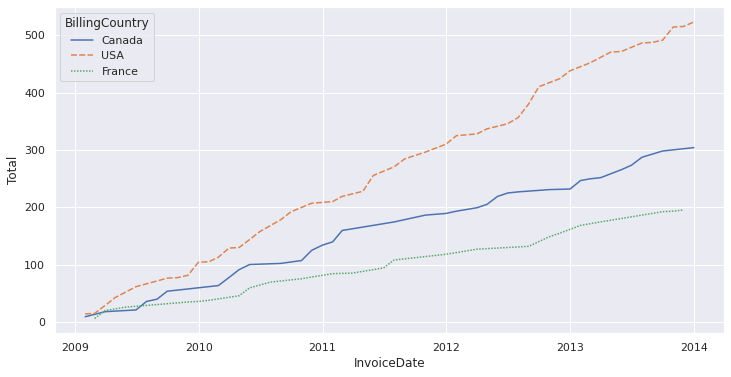

In [ ]:
# black and white redundancy
sns.lineplot(data=gb, x='InvoiceDate', y='Total', hue='BillingCountry', style='BillingCountry')

* Simplesmente adicionamos o argumento style com a variável à qual queremos aplicar estilos diferentes. 

* Os estilos de linha são determinados automaticamente, mas também podemos adicionar outro argumento, dashes, para especificar nossos estilos de linha exatos. 

* Por exemplo, poderíamos usar dashes=[(2, 1), (5, 2), ''] 

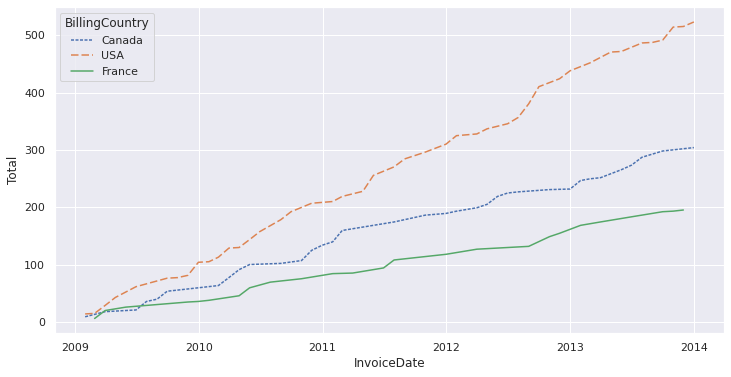

In [ ]:
sns.lineplot(data=gb, x='InvoiceDate', y='Total', hue='BillingCountry', style='BillingCountry', dashes=[(2, 1), (5, 2), ''])

Usamos dashes=[(2, 1), (5, 2), ''] para especificar que 
  * a primeira linha deve ter uma linha de 2 pontos e um espaço de 1 ponto. Um ponto é um termo tipográfico usado para medição na impressão, como com fonte de 12 pontos (aproximadamente o tamanho da maioria das fontes que lemos). 
  * O segundo estilo de linha no argumento dos traços é (5, 2), significando uma linha de 5 pontos com um espaço de 2 pontos, repetindo. 
  * Por fim, o vazio, '', significa que a última série de dados deve ser uma linha sólida. 
 

A partir da figura, podemos ver que os EUA estão claramente em uma trajetória mais acentuada em termos de vendas em comparação com o Canadá e a França, que têm inclinações de linha quase iguais. Isso pode significar que devemos concentrar nossos esforços em nossos clientes dos EUA, pois eles parecem fornecer a maior parte de nossa receita no futuro.

## 5 . Rotule claramente eixos e conjuntos de dados e use um único tamanho de fonte com uma fonte sem serifa

Nossa penúltima prática recomendada é rotular claramente eixos e conjuntos de dados e usar um único tamanho de fonte com uma fonte sem serifa. 

* Isso geralmente é feito automaticamente para nós com seaborn e muitos pacotes de plotagem Python, mas com outros, rótulos de eixos e conjuntos de dados nem sempre são rotulados. 

* Com um gráfico de pandas, por exemplo, podemos adicionar rótulos de eixos com `plt.xlabel('your label here')` e `plt.ylabel('label goes here')`. 

* Também devemos minimizar o número de diferentes tamanhos de fonte usados ​​e buscar um único tamanho de fonte. 
  * Muitos tamanhos de fonte diferentes fazem com que os gráficos pareçam cheios e confusos. 
* Por último, certifique-se de usar fontes sans-serif. 
  * As fontes serifadas têm bordas curvas nas letras, como a escrita neste livro. Isso nos ajuda a ler muito texto com mais facilidade, mas adiciona mais informação aos gráficos, e a quantidade de texto nos gráficos deve ser minimizada independentemente. 
  * Atenha-se a fontes simples e sem serifa para gráficos e evite Comic Sans (a menos que seja apropriado para o seu público).

## 6 . Adapte suas visualizações ao público

Isso nos leva à nossa última prática recomendada em nossa lista, que é adaptar o gráfico ao nosso público. 

Por exemplo, fonte Comic Sans geralmente não é apropriado para gráficos, pois parece pouco profissional. 
* No entanto, em um ambiente mais informal, como uma sala de aula infantil ou um quadrinho online como xkcd, pode funcionar. 


Em geral, os gráficos de pizza são desaprovados nas comunidades de visualização, mas há casos em que podemos usá-los.
* Por exemplo, ensinar frações para crianças é auxiliado por gráficos de pizza, porque eles podem ver as partes do todo com facilidade, e se relaciona com tortas, que a maioria das crianças gosta. 


Outros aspectos da adaptação do gráfico podem incluir um título, gráficos, cores e anotações de texto. 
* Por exemplo, se estivermos criando um gráfico para compartilhar no Twitter, podemos adicionar um título caso as pessoas compartilhem o gráfico sem fornecer contexto. 
  * O título deve ser curto e descritivo dos dados, que pode ser algo como "Vendas cumulativas do iTunes para os 3 principais países" para nossos gráficos de linhas acima. 
  * Isso pode ser adicionado a gráficos baseados em matplotlib com plt.title('Vendas cumulativas do iTunes para os 3 principais países'). 
* Para uma configuração mais informal como o Twitter, também podemos adicionar um pequeno gráfico ou logotipo no canto do gráfico para branding. 
  * No entanto, em uma reunião ou relatório profissional, um gráfico fofo pode ser um erro. 


Também podemos querer destacar qualquer fenômeno interessante nos dados com destaques ou anotações de texto. 
  * Um exemplo de destaque seria tornar uma das linhas em negrito em nosso gráfico de linhas acima, o que poderíamos realizar com:

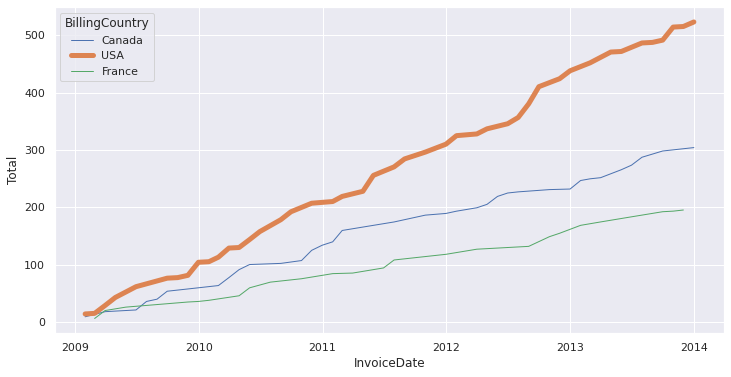

In [ ]:
sns.lineplot(data=gb, x='InvoiceDate', y='Total', hue='BillingCountry', size='BillingCountry', sizes=[1, 5, 1])

Isso torna a linha dos EUA mais espessa, chamando a atenção para ela. 
* Primeiro damos o argumento size='BillingCountry' para especificar que a variável country será usada para determinar os tamanhos das linhas. * Em seguida, fornecemos uma lista de números para o argumento de tamanhos, que são tamanhos de pontos para as linhas. 
* Como a segunda série de dados corresponde aos EUA, aumentamos o tamanho do ponto dessa linha para destacá-la. 
* Descobrir como a ordem da série de dados corresponde à ordem dos tamanhos do argumento requer tentativa e erro (ou podemos ver na legenda). 
* Também podemos usar texturas ou cores diferentes para chamar a atenção para partes dos dados que justificam nosso interesse. 

Isso encerra nossas práticas recomendadas de visualização. 

No entanto, alguns aspectos das visualizações são subjetivos e outros podem ter ideias ligeiramente diferentes sobre como são as melhores visualizações. 

Em geral, as ideias sobre as quais falamos aqui são aceitas pela maioria: 
* mantenha os gráficos simples e livres de lixo, 
* use cor adequadamente
* use o gráfico certo para seus dados, 
* faça gráficos redundantes (quando for o caso)
* rotule adequadamente seus gráficos e use texto adequadamente e
* adapte seus gráficos ao seu público.